### Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
# Load the dataset
credit_df = pd.read_csv("creditcard.csv")
# Show the first five rows using dataframe.head() method
print("The first 5 rows of the dataset")
credit_df.head()

The first 5 rows of the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### All features in this dataset have been anonymized to protect privacy, except for the "Time" and "Amount" features.

In [ ]:
# Show the last 10 rows using dataframe.head() method
print("The last 10 rows of the dataset")
credit_df.tail()

The last 10 rows of the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Initial Data Insights

In [ ]:
# Dimensions of the dataset
credit_df.shape

(284807, 31)

In [ ]:
# Info of the dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Descriptive statistics of the dataset
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
# Check for missing data
missing_df = credit_df.isnull().sum()
missing_df

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As shown above, there are no mising entries in the dataset

In [ ]:
credit_df.duplicated().any()

True

This dataset contains duplicate entries, which will be intentionally retained for the following reasons:

- They may be indicative of fraudulent activity
- Represent high-risk transactions or contain valuable patterns and relationships between transactions that could aid in fraud detection.
Removing duplicates could potentially limit the model's ability to identify these critical connections and detect fraud effectively.

### Analysis of the distribution of observations across the labels.
#### It is an analysis of:
- How many observations belong to each label?
- Are the observations evenly distributed across labels or is there an imbalance?

This analysis helps understand the structure of the data, identify potential issues like class imbalance, and inform decisions about data preprocessing, model selection, and performance evaluation.

In [ ]:
not_fraud = credit_df[credit_df["Class"]==0]
fraud = credit_df[credit_df["Class"]==1]

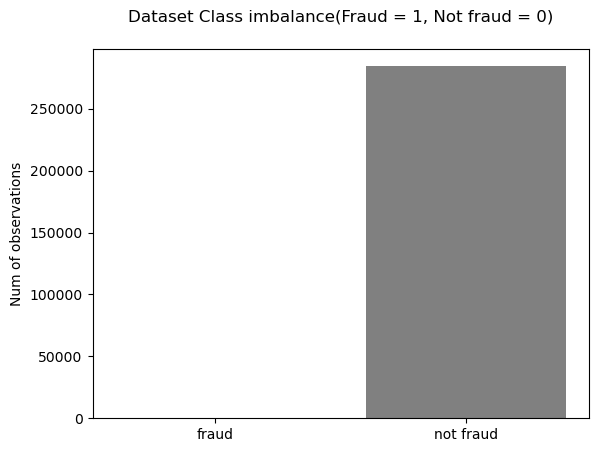

In [ ]:
# Get all possible labels
labels = credit_df["Class"].unique()
heights = [len(fraud),len(not_fraud)]
plt.bar(labels,heights,color='gray')
plt.title("Dataset Class imbalance(Fraud = 1, Not fraud = 0)", y = 1.05)
plt.xticks(labels,["fraud","not fraud"])
plt.ylabel("Num of observations")
plt.show()

The dataset is unevenly distributed, with a significant disparity in the number of instances across different classes. To tackle this imbalance, various strategies can be applied, including resampling, class weightig, or generating synthetic data.
In this particular study, I will utilize the Class Weighing technique to address the imbalance and ensure more accurate model performance.

In [ ]:
# Count of values within the "Class" column
counts_class = credit_df['Class'].value_counts()

# Count of values that are fraud(1,fraudulent) or not_fraud(0,legitimate)
count_fraud = counts_class.get(1)
count_not_fraud = counts_class.get(0)

print(f"Count of fraudulent transactions: {count_fraud}")
print(f"Count of legitimate transactions {count_not_fraud}")

# Percentage of non-fraud in the dataset
Percent_nonfraud = len(not_fraud)/(len(credit_df))
print(f"Percentage of non-fraud: {Percent_nonfraud}")


Count of fraudulent transactions: 492
Count of legitimate transactions 284315
Percentage of non-fraud: 0.9982725143693799


As shown above, we have only 495 counts of fraudulent transactions, This means that only a small fraction, about 0.17% (1 - 0.9982725143693799) are fraudulent transactions.
In other words, the dataset is heavily imbalanced, with a vast majority of transactions being legitimate and a relatively tiny minority being fraudulent.

### Preprocessing
#### Data Standardization

In [ ]:
# labels
y = credit_df["Class"]

# features
X = credit_df.drop("Class", axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Used a standardscaler instead of MinMaxScaler because PCA was used on the original dataset

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
X_scaled = scaler.fit_transform(X)

# Convert the scaled x_train values into a dataframe
X_standardised = pd.DataFrame(X_scaled, columns=X.columns)
# The first 5 rows of the standardised features
X_standardised.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


#### Spitting the data

In [ ]:
# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle = True, random_state=42)

### Model Training with Logistic Regression

In [ ]:
# Create an instance of the logisticRegression() object and fit the model
model_reg = LogisticRegression(class_weight = "balanced")

# fitting the model
model_reg.fit(X_train,y_train)

C:\Users\THELMA\anaconda3\envs\Python_package\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

To tackle the class imbalance problem in the dataset, I employed class weighting in both the model and evaluation metrics (F1_Score), giving more importance to the minority class (fraudulent transactions). This approach ensures that the model is optimized to accurately detect fraudulent transactions, which is crucial for preventing financial losses and minimizing risk.

In [ ]:
# Intercept
model_reg.intercept_[0]

-0.45110667547960387

In [ ]:
# Coefficient
coeff_df = pd.DataFrame(model_reg.coef_.T, X.columns, columns=['Coefficient'])

# Sort the coefficients by their absolute values
sorted_coefficients = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the sorted coefficients
print(sorted_coefficients)

        Coefficient
V14       -0.918805
V4         0.674714
V3        -0.488594
V8        -0.476507
V5         0.412678
V12       -0.400211
V22        0.302880
V10       -0.278582
V15       -0.260758
V9        -0.232977
V16       -0.232190
V17       -0.203574
V13       -0.192514
V1         0.163678
V6        -0.154215
V21        0.152328
V25       -0.147051
V20       -0.115108
V7         0.108970
V2        -0.106130
V18        0.069789
V23       -0.065947
V26       -0.064487
V27        0.042815
V28        0.035958
V11       -0.031709
V24       -0.019971
V19        0.019001
Amount     0.000396
Time      -0.000028


As seen above, features V14, V4, V3, V8, V5 are more influential in predicting fraudulent transactions while features with coefficients close to zero have less predicting power in identifying fraudulent activites.

### Model Testing

The AUC-ROC metric evaluates how well the model is capable of distinguishing between classes i.e true positives (fraudulent transactions correctly identified) and false positives (legitimate transactions misclassified as fraudulent).

In [ ]:
def roc_score(model_reg, X_test, y_test):
    """ Calculates the AUC-ROC of the model

    Parameters:
    - model_reg: a trained classification model
    - X_test: the testing data features
    - y_test: the testing data target (true labels)

    Returns:
    - The ROC-AUC score as a floating-point number.
    """
    # Predict probabilities of positive class
    y_pred_prob = model_reg.predict_proba(X_test)[:, 1]
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    return float(roc_auc)

In [ ]:
print(roc_score(model_reg,X_test,y_test))

0.9789770508653659


The high ROC-AUC value indicates better model performance. I'll use the ROC-AUC in conjuction with other metrics, such as accuracy, precision, recall, and F1 score to get a comprehensive understanding of the model's performance.

#### Predicting the labels for our test set

In [ ]:
y_pred =  model_reg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
from sklearn.metrics import log_loss
# Get predictions on the test set
y_pred = model_reg.predict_proba(X_test)
# Calculate the log loss (this was imported from sklearn above somewhere)
print("The log loss error for our model is: ", log_loss(y_test, y_pred))

The log loss error for our model is:  0.14189038123944922


Predictions of 1 represents fraudulent transactions, while 0 depicts legitimate transactions.

#### Other metrics:

In [ ]:
def scores(model_reg, X_test, y_test):
    """ Calculates the Accuracy, Precision, Recall and F1 scores.

    Parameter:
    - model_reg : Fitted classification model
    - X_test: A numpy array containing the splitted X_test feature
    - y_test: A numpy array containing the splitted y_test feature

    Returns:
    - A tuple in the form (Accuracy, Precision, Recall, F1-Score)
    """
    y_pred =  model_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,  y_pred)
    recall = recall_score(y_test,  y_pred)
    f1 = f1_score(y_test,y_pred,average="weighted")

    return (accuracy, precision, recall, f1)

In [ ]:
(accuracy, precision, recall, f1) = scores(model_reg, X_test, y_test)

print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.967908
Precision: 0.047594
Recall: 0.928571
F1 score: 0.982129


Summary of Logistic Regression:
- Correctly classifies about 96.79% of all transactions.
- Has a low precision, indicating many False Positives (legitimate transactions misclassified as fraudulent).
- Detects about 92.86% of all fraudulent transactions.
- Has an excellent F1 score, indicating a good balance between precision and recall.

#### Classification Report
- This report provides valuable insights into how well the model performs for different classes.

In [ ]:

from sklearn.metrics import classification_report

def get_class_report(model_reg, X_test, y_test):
    y_pred = model_reg.predict(X_test)

    # Generate the classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print("Classification Report:")
    return report

In [ ]:
print(get_class_report(model_reg,X_test,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



The report above shows that the model performs well on the majority class (non-fraudulent transactions) but struggles with the minority class (fraudulent transactions) as indicated by the low F1_score and precision for class 1. However, the weighted avg indicate that the model's performance is still good overall.

### Model Comparison
#### To build multiple models using different algorithms (Decision Tree and Random Forest) and compare their performance on the dataset.
 Comparing the performance of different models, helps to:
- Evaluate the strengths and weaknesses of each algorithm
- Identify the best model for your specific problem and dataset
- Gain insights into how different models generalize and make predictions

#### DECISION TREES

In [ ]:
# Instantiate decision tree () object
tree_card_model = DecisionTreeClassifier(class_weight="balanced",random_state=42)
# Fit the model
tree_card_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

Class weighting approach is used in the Decision Tree model, to address the issue of uneven class distribution within the dataset.

#### Model Testing
- ROC-AUC
- Accuracy, Precision, Recall, F1_score
- Classification Report

In [ ]:
print("The ROC-AUC value for the Decision Tree Model:")
print(roc_score(tree_card_model,X_test,y_test))

The ROC-AUC value for the Decision Tree Model:
0.8773136118544209


The ROC-AUC value above suggest a good performance model, as it is able to distinguish between classes well

In [ ]:
y_pred = tree_card_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
y_pred = tree_card_model.predict_proba(X_test)
# Calculate the log loss (this was imported from sklearn above somewhere)
print("The log loss error for our model is: ", log_loss(y_test, y_pred))

The log loss error for our model is:  0.0322710986771003


#### Accuracy, Precision, Recall, F1_score

In [ ]:
(accuracy, precision, recall, f1) = scores(tree_card_model, X_test, y_test)

print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.999105
Precision: 0.732673
Recall: 0.755102
F1 score: 0.999111


 Summary of Decision Tree model:
- Correctly classifies almost all transactions (99.91% accuracy).
- Has a relatively low precision (73.27%), indicating some False Positives.
- Detects a significant portion of fraudulent transactions (75.51% recall).
- Has an excellent F1 score (99.91%), indicating a good balance between precision and recall.

#### Classification Report

In [ ]:
print(get_class_report(tree_card_model,X_test,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.76      0.74        98

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



The report shows that the decision tree model performs exceptionally well on the majority class (legitimate transactions) and reasonably well on the minority class (fraudulent transactions).

#### Random Forest

In [ ]:
# Instantiate RandomForest() object
forest_card_model = RandomForestClassifier(class_weight="balanced",n_estimators=100, random_state=42)
# Fit the model
forest_card_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Class weighting approach is used in the Random Forest model, to address the issue of uneven class distribution within the dataset.

#### Model Testing
- ROC-AUC
- Accuracy, Precision, Recall, F1_score
- Classification Report

In [ ]:
y_pred = forest_card_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
y_pred = forest_card_model.predict_proba(X_test)
# Calculate the log loss (this was imported from sklearn above somewhere)
print("The log loss error for our model is: ", log_loss(y_test, y_pred))

The log loss error for our model is:  0.007279022791536897


In [ ]:
print("The ROC-AUC value for the Random Forest Model:")
print(roc_score(forest_card_model,X_test,y_test))

The ROC-AUC value for the Random Forest Model:
0.9478120190816901


The ROC-AUC value indicates better model performance

#### Accuracy, Precision, Recall, F1_score

In [ ]:
(accuracy, precision, recall, f1) = scores(forest_card_model, X_test, y_test)

print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.999561
Precision: 0.986667
Recall: 0.755102
F1 score: 0.999532


Summary of Random Forest Model:
- Correctly classifies almost all transactions (99.96% accuracy).
- Has a high precision (98.67%), indicating few False Positives.
- Detects a significant portion of fraudulent transactions (75.51% recall).
- Has an excellent F1 score (99.95%), indicating a good balance between precision and recall.

Overall,The model performs exceptionally well, with high accuracy, precision, and F1 score, indicating effective detection of fraudulent transactions while minimizing false positives.

#### Classification Report

In [ ]:
print(get_class_report(forest_card_model,X_test,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



The report shows that the Random Forest model performs exceptionally well on both classes, with:

- High precision and recall for legitimate transactions (Class 0)
- High precision and moderate recall for fraudulent transactions (Class 1)
- Excellent overall accuracy and F1-score

## Conclusion

Based on the analysis, the Random Forest model outperforms the Linear and Decision Tree models in terms of ROC-AUC, accuracy, and F1-Score. While the Linear model has high precision, it suffers from low recall.

The Decision Tree model shows promise, but its performance is inconsistent. The Random Forest model strikes a balance between precision and recall, making it the most suitable choice for our credit card fraud detection problem. Note perfect model would have a log loss of 0. Notice that the log loss is higher than it was for the Naive Bayes mode